## We want to build a decision tree to find out what are the most important features that help to determine whether public spaces are loveable or not

The decision tree can also potentially be used to determine whether a particular person love  or do not love public spaces


In [1]:
#import python packages
import pandas as pd
import numpy as np

In [2]:
 #import raw data into pandas dataframe
data=pd.read_csv('Decision _Tree.csv')

In [3]:
#quick glance at the dataframe
data.head() 

,Living around Paya Lebar,Good Memories,Frequency of Visit,Visit Paya Lebar with,Current state-Social Offerings Rating,Current state-Openness Rating,Current state-Aesthetics/Amenities Rating,Current state-Cultural Heritage Rating,Love Playground,Good Memories of Food,Restricted by Security Guard,Accessible/Convenient,Green/Blue Spaces,Spacious/Openness for the Place,Convenient for Study/Working,Miss old Paya Lebar,Public Spaces are Loveable
0,3 to 5 Years,Yes,1-2/week,Friends,5,5,5.0,5.0,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes
1,6 to 10 Years,Yes,Everyday,Family,3,3,5.0,3.0,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes
2,0 to 2 Years,Yes,Everyday,Friends,2,4,3.0,3.0,Yes,Yes,Yes,Yes,No,Yes,No,No,No
3,3 to 5 Years,No,Everyday,Friends,1,5,3.0,3.0,Yes,Yes,Yes,Yes,No,Yes,No,No,No
4,3 to 5 Years,No,1-2/week,Family,2,5,2.0,3.0,Yes,Yes,Yes,Yes,No,No,No,Yes,No


In [4]:
len(data) #our dataset has 92 rows(small dataset)

92

In [5]:
# classification of the target class (whether public spaces are loveable) is quite balanced
data["Public Spaces are Loveable"].value_counts()

Yes    46
No     46
Name: Public Spaces are Loveable, dtype: int64

In [6]:
#handling categorical variables (for categorical variables with 2 classes-label encoding)
data["Good Memories"].replace(('Yes', 'No'), (1, 0), inplace=True)
data["Love Playground"].replace(('Yes', 'No'), (1, 0), inplace=True)
data["Good Memories of Food"].replace(('Yes', 'No'), (1, 0), inplace=True)
data["Restricted by Security Guard"].replace(('Yes', 'No'), (1, 0), inplace=True)
data["Accessible/Convenient"].replace(('Yes', 'No'), (1, 0), inplace=True)
data["Green/Blue Spaces"].replace(('Yes', 'No'), (1, 0), inplace=True)
data["Spacious/Openness for the Place"].replace(('Yes', 'No'), (1, 0), inplace=True)
data["Convenient for Study/Working"].replace(('Yes', 'No'), (1, 0), inplace=True)
data["Miss old Paya Lebar"].replace(('Yes', 'No'), (1, 0), inplace=True)
data["Public Spaces are Loveable"].replace(('Yes', 'No'), (1, 0), inplace=True)

In [7]:
#handling categorical variables (for multiple classes-one-hot encoding)
data2 = pd.get_dummies(data = data, columns = ['Living around Paya Lebar',\
                                                'Frequency of Visit','Visit Paya Lebar with']) 

In [8]:
data2.columns

Index(['Good Memories', 'Current state-Social Offerings Rating',
       'Current state-Openness Rating',
       'Current state-Aesthetics/Amenities Rating',
       'Current state-Cultural Heritage Rating', 'Love Playground',
       'Good Memories of Food', 'Restricted by Security Guard',
       'Accessible/Convenient', 'Green/Blue Spaces',
       'Spacious/Openness for the Place', 'Convenient for Study/Working',
       'Miss old Paya Lebar', 'Public Spaces are Loveable',
       'Living around Paya Lebar_ more than 10 Years',
       'Living around Paya Lebar_0 to 2 Years',
       'Living around Paya Lebar_3 to 5 Years',
       'Living around Paya Lebar_4 to 5 Years',
       'Living around Paya Lebar_6 to 10 Years', 'Living around Paya Lebar_No',
       'Living around Paya Lebar_more than 10 Years',
       'Frequency of Visit_1-2/week', 'Frequency of Visit_1/ fortnight',
       'Frequency of Visit_3-6/week', 'Frequency of Visit_Everyday',
       'Frequency of Visit_First time', 'Visit Pa

In [9]:
#input and outputs of the classification model, where y is the target class/variable
x = data2.drop(columns= 'Public Spaces are Loveable')
y = data2['Public Spaces are Loveable']

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
#train the classification model 
#
#use train test split for model validation (validating the performance of the model on new data)
#train set 80%, test set 20%, stratification is applied to ensure that both
#the train and test sets have the same/similar proportion of class labels 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                          stratify = y,random_state = 1)
# https://stackoverflow.com/questions/29438265/stratified-train-test-split-in-scikit-learn 
#traintestsplit with stratify vs stratified shuffle split

#https://xzz201920.medium.com/stratifiedkfold-v-s-kfold-v-s-stratifiedshufflesplit-ffcae5bfdf
#stratified k fold cross validation seemm better than stratified shuffle split


# Instantiate dt and criterion can be gini or entropy (strategy to choose features for a split/measure quality of split
# at each node of the decision tree)
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
#max_depth=4 (results in overfitting as specificity and precision score is 1 out of 1)
    
# Fit dt to the training set
dt.fit(X_train, y_train) 

# Predict test set labels
y_pred = dt.predict(X_test)

In [13]:
#visualise decision tree rules 
from sklearn import tree
from matplotlib import pyplot as plt

text_representation = tree.export_text(dt,feature_names = dt.feature_names_in_.tolist())
print(text_representation)

|--- Good Memories <= 0.50
|   |--- Current state-Social Offerings Rating <= 3.50
|   |   |--- class: 0
|   |--- Current state-Social Offerings Rating >  3.50
|   |   |--- Visit Paya Lebar with_Colleagues <= 0.50
|   |   |   |--- class: 1
|   |   |--- Visit Paya Lebar with_Colleagues >  0.50
|   |   |   |--- class: 0
|--- Good Memories >  0.50
|   |--- Living around Paya Lebar_No <= 0.50
|   |   |--- Green/Blue Spaces <= 0.50
|   |   |   |--- class: 1
|   |   |--- Green/Blue Spaces >  0.50
|   |   |   |--- class: 1
|   |--- Living around Paya Lebar_No >  0.50
|   |   |--- Current state-Cultural Heritage Rating <= 1.75
|   |   |   |--- class: 0
|   |   |--- Current state-Cultural Heritage Rating >  1.75
|   |   |   |--- class: 0



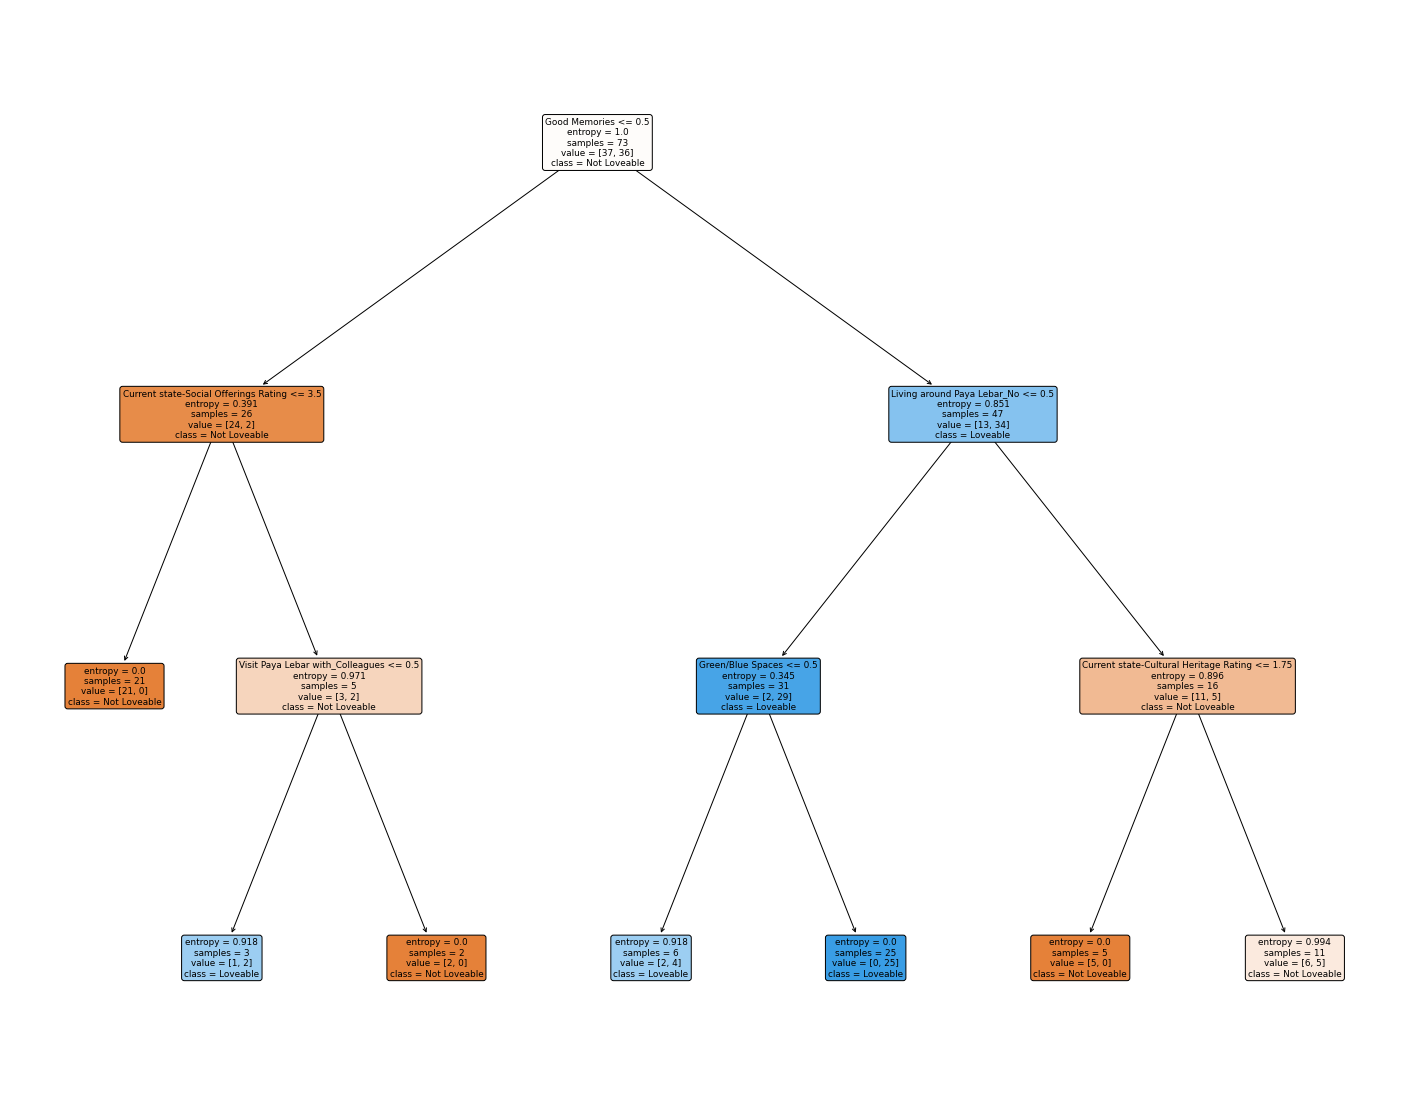

In [14]:
#visualise decision tree
from sklearn import tree
from matplotlib import pyplot as plt
#https://mljar.com/blog/visualize-decision-tree/
fig = plt.figure(figsize=(25,20))
# dt_viz = tree.plot_tree(dt, 
#                    feature_names = dt.feature_names_in_, class_names=dt.classes_.astype(str),
#                    filled=True, rounded=True,proportion=True)
dt_viz = tree.plot_tree(dt, 
                   feature_names = dt.feature_names_in_, class_names=["Not Loveable","Loveable"],
                   filled=True, rounded=True,proportion=False)
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
fig.savefig("decision_tree.png", facecolor="white")
#note the features nearer to the root of the decision tree doesn't necessarily means that it is the most important feature
#refer to feature importance calculation below
#note the left side of the split means "Yes, lesser than or equal to the threshold"
#https://stackoverflow.com/questions/64404487/how-to-change-features-threshold-of-decision-trees-after-applying-one-hot-encode
#Note Living around Paya Lebar No <= 0.5 means living around Paya Lebar NIL =0, if >=0.5 than it means that
#living around Paya Lebar is 1. because the one-hot-encoded values have binary values of 0 or 1 


In [15]:
#evaluation metrics for the classification model
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])
cf = pd.DataFrame(cnf_matrix, columns = ['Predicted pos', 'Predicted neg'], index = ['Actual pos', 'Actual neg'])
cf

,Predicted pos,Predicted neg
Actual pos,6,4
Actual neg,2,7


In [16]:
#evaluation metrics for the classification model
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
precision = tp / (tp + fp)
recall_or_sensitivity = tp / (tp + fn)
f1=2*((precision*recall_or_sensitivity)/(recall_or_sensitivity+precision))

print('Accuracy',round(accuracy_score(y_test, y_pred),2))
print("Specificity :", round(specificity,2))
print("Precision :", round(precision, 2))
print("Recall or Sensitivity :", round(recall_or_sensitivity, 2))
print("F1 score",round(f1,2))
#weighted average of precision and recall

Accuracy 0.68
Specificity : 0.78
Precision : 0.75
Recall or Sensitivity : 0.6
F1 score 0.67


In [17]:
#determine important features
#The importance of a feature is computed as the (normalized) total reduction 
# of the criterion (Entropy) brought by that feature
vi = dt.feature_importances_

n = len(dt.feature_names_in_)
for i in range(0,n):
    print(dt.feature_names_in_[i] + '   :',vi[i].round(3))

Good Memories   : 0.424
Current state-Social Offerings Rating   : 0.099
Current state-Openness Rating   : 0.0
Current state-Aesthetics/Amenities Rating   : 0.0
Current state-Cultural Heritage Rating   : 0.063
Love Playground   : 0.0
Good Memories of Food   : 0.0
Restricted by Security Guard   : 0.0
Accessible/Convenient   : 0.0
Green/Blue Spaces   : 0.096
Spacious/Openness for the Place   : 0.0
Convenient for Study/Working   : 0.0
Miss old Paya Lebar   : 0.0
Living around Paya Lebar_ more than 10 Years   : 0.0
Living around Paya Lebar_0 to 2 Years   : 0.0
Living around Paya Lebar_3 to 5 Years   : 0.0
Living around Paya Lebar_4 to 5 Years   : 0.0
Living around Paya Lebar_6 to 10 Years   : 0.0
Living around Paya Lebar_No   : 0.278
Living around Paya Lebar_more than 10 Years   : 0.0
Frequency of Visit_1-2/week   : 0.0
Frequency of Visit_1/ fortnight   : 0.0
Frequency of Visit_3-6/week   : 0.0
Frequency of Visit_Everyday   : 0.0
Frequency of Visit_First time   : 0.0
Visit Paya Lebar with_A

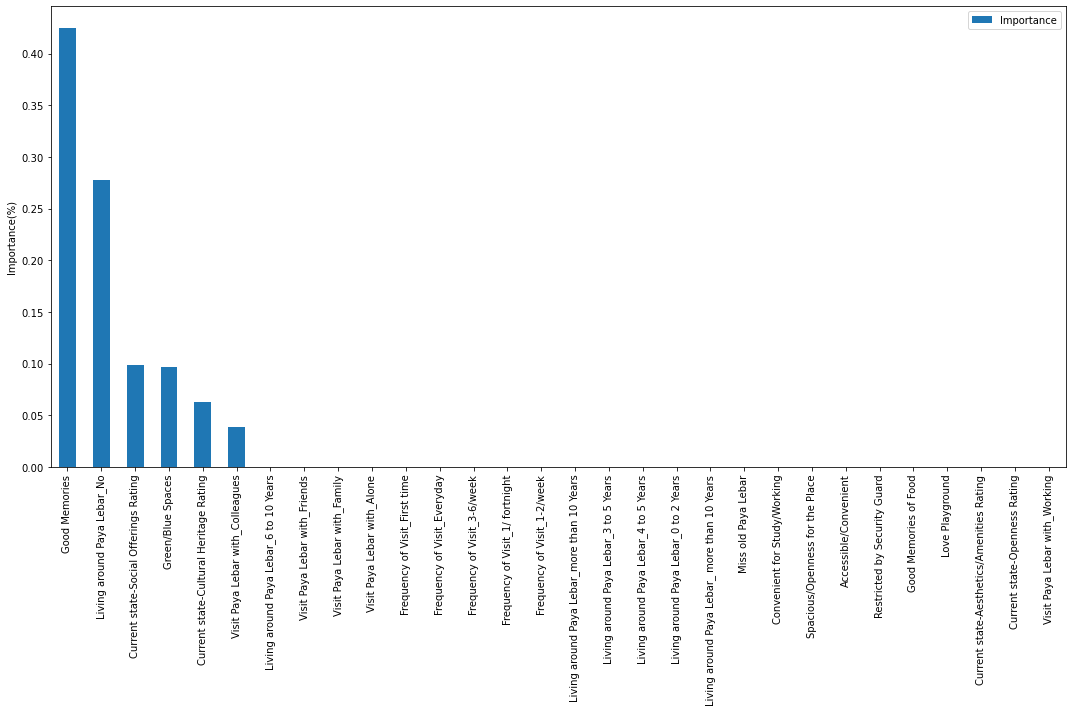

In [18]:
#visualise feature importance
#https://stackoverflow.com/questions/69061767/how-to-plot-feature-importance-for-decisiontreeclassifier
feat_importances = pd.DataFrame(dt.feature_importances_, index=dt.feature_names_in_, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
#https://stackoverflow.com/questions/45376232/how-to-save-image-created-with-pandas-dataframe-plot
feat_importances_fig=feat_importances.plot(kind='bar',ylabel="Importance(%)",figsize=(15,10)).get_figure()
#https://stackoverflow.com/questions/45239261/matplotlib-savefig-text-chopped-off
feat_importances_fig.tight_layout()
feat_importances_fig.savefig("feature_importance.png", facecolor="white")

In [19]:
#comparing results with another classification model (Logistic Regression model)
from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression(solver = 'liblinear',C=0.01, random_state = 1)
#hyperparameter tuning by changing the complexity parameter. low C value will leads to more regularisation
#which helps to prevent overfitting
lmodel.fit(X_train,y_train)
y_pred1 = lmodel.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred1, labels = [1,0])
cf = pd.DataFrame(cnf_matrix, columns = ['Predicted pos', 'Predicted neg'], index = ['Actual pos', 'Actual neg'])
cf


,Predicted pos,Predicted neg
Actual pos,10,0
Actual neg,4,5


In [20]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()
specificity = tn / (tn+fp)
precision = tp / (tp + fp)
recall_or_sensitivity = tp / (tp + fn)
f1=2*((precision*recall_or_sensitivity)/(recall_or_sensitivity+precision))

print("Accuracy for LogisticRegression :")
print(round(accuracy_score(y_test, y_pred1),2))
print("Specificity :", round(specificity,2))
print("Precision :", round(precision, 2))
print("Recall or Sensitivity :", round(recall_or_sensitivity, 2))
print("F1 score",round(f1,2))


Accuracy for LogisticRegression :
0.79
Specificity : 0.56
Precision : 0.71
Recall or Sensitivity : 1.0
F1 score 0.83


In [21]:
#importance of feature is based on the magnitude of the coefficents
lfeat=lmodel.coef_
#get indices of the array (absolute) values sorted in descending order
#https://www.geeksforgeeks.org/numpy-argsort-in-python/
sel=np.argsort(abs(lfeat[0]))[::-1]
print(sel)
# print importance features in descending level of importance
print(lmodel.feature_names_in_[sel])

[18  1  0  2  7  9  6 15  5 27 10 28  4  8 19  3 26 20 14 12 24 21 17 25
 29 13 11 23 22 16]
['Living around Paya Lebar_No' 'Current state-Social Offerings Rating'
 'Good Memories' 'Current state-Openness Rating'
 'Restricted by Security Guard' 'Green/Blue Spaces'
 'Good Memories of Food' 'Living around Paya Lebar_3 to 5 Years'
 'Love Playground' 'Visit Paya Lebar with_Family'
 'Spacious/Openness for the Place' 'Visit Paya Lebar with_Friends'
 'Current state-Cultural Heritage Rating' 'Accessible/Convenient'
 'Living around Paya Lebar_more than 10 Years'
 'Current state-Aesthetics/Amenities Rating'
 'Visit Paya Lebar with_Colleagues' 'Frequency of Visit_1-2/week'
 'Living around Paya Lebar_0 to 2 Years' 'Miss old Paya Lebar'
 'Frequency of Visit_First time' 'Frequency of Visit_1/ fortnight'
 'Living around Paya Lebar_6 to 10 Years' 'Visit Paya Lebar with_Alone'
 'Visit Paya Lebar with_Working'
 'Living around Paya Lebar_ more than 10 Years'
 'Convenient for Study/Working' 'Frequency of 

<AxesSubplot:>

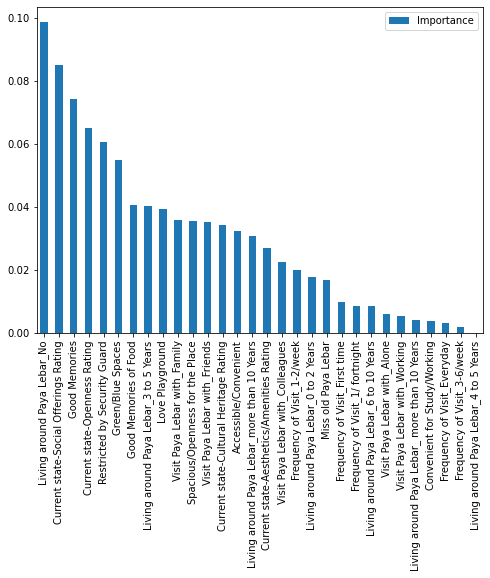

In [22]:
#visualise feature importance
#https://stackoverflow.com/questions/69061767/how-to-plot-feature-importance-for-decisiontreeclassifier
feat_importances = pd.DataFrame(abs(lmodel.coef_)[0], index=lmodel.feature_names_in_, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))